# Sensitivity Analysis

In [1]:
import pandas as pd
from Data.Featurisation import data_handeler
from Models.models import source, target
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
from scale import Scale
from hyperparameters.hyperparameters import hyperparameters_source, hyperparameters_target
import torch
import scienceplots
plt.style.use(['science'])
import warnings
import numpy as np
from sklearn.svm import SVR
from Models.lstm import LSTM
from tensors.Tensorisation import Tensorisation
from scale import Scale
from pvlib import location

## Physics-informed measures
- is_day
- PoA, T_PV
- inverter limit
- decomposition

### Calclations

IS DAY

In [8]:
my_index = pd.MultiIndex.from_product([range(7), range(13)])
rmse = pd.DataFrame(index=my_index, columns=range(4))
sites = range(4)
model = 1


In [9]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(0, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([841, 24, 7]) torch.Size([210, 24, 7]) torch.Size([841, 24, 1]) torch.Size([210, 24, 1])
Step 0: Average train loss: 0.0538 | Average test loss: 0.0406
Step 5: Average train loss: 0.0141 | Average test loss: 0.0101
Step 10: Average train loss: 0.0115 | Average test loss: 0.0096
Step 15: Average train loss: 0.0111 | Average test loss: 0.0089
Step 20: Average train loss: 0.0107 | Average test loss: 0.0090
Step 25: Average train loss: 0.0105 | Average test loss: 0.0090
Step 30: Average train loss: 0.0104 | Average test loss: 0.0091
Step 35: Average train loss: 0.0104 | Average test loss: 0.0090
Step 40: Average train loss: 0.0103 | Average test loss: 0.0090
Step 45: Average train loss: 0.0103 | Average test loss: 0.0088
Step 50: Average train loss: 0.0098 | Average test loss: 0.0083
Step 55: Average train loss: 0.0096 | Average test loss: 0.0082
Step 60: Average train loss: 0.0099 | Average test loss: 0.0090
Step 65: Av

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False, HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(1, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 6]) torch.Size([140, 24, 6]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0581 | Average test loss: 0.0352
Step 5: Average train loss: 0.0281 | Average test loss: 0.0189
Step 10: Average train loss: 0.0129 | Average test loss: 0.0128
Step 15: Average train loss: 0.0119 | Average test loss: 0.0108
Step 20: Average train loss: 0.0111 | Average test loss: 0.0101
Step 25: Average train loss: 0.0107 | Average test loss: 0.0104
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0104 | Average test loss: 0.0101
Step 40: Average train loss: 0.0103 | Average test loss: 0.0100
Step 45: Average train loss: 0.0101 | Average test loss: 0.0096
Step 50: Average train loss: 0.0100 | Average test loss: 0.0093
Step 55: Average train loss: 0.0099 | Average test loss: 0.0094
Step 60: Average train loss: 0.0096 | Average test loss: 0.0089
Step 65: Av

PoA and T_PV

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(2, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 6]) torch.Size([140, 24, 6]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0502 | Average test loss: 0.0360
Step 5: Average train loss: 0.0167 | Average test loss: 0.0148
Step 10: Average train loss: 0.0121 | Average test loss: 0.0105
Step 15: Average train loss: 0.0112 | Average test loss: 0.0110
Step 20: Average train loss: 0.0109 | Average test loss: 0.0111
Step 25: Average train loss: 0.0106 | Average test loss: 0.0106
Step 30: Average train loss: 0.0105 | Average test loss: 0.0104
Step 35: Average train loss: 0.0104 | Average test loss: 0.0103
Step 40: Average train loss: 0.0103 | Average test loss: 0.0102
Step 45: Average train loss: 0.0103 | Average test loss: 0.0100
Step 50: Average train loss: 0.0102 | Average test loss: 0.0100
Step 55: Average train loss: 0.0102 | Average test loss: 0.0100
Step 60: Average train loss: 0.0099 | Average test loss: 0.0103
Step 65: Av

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False, HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(3, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 7]) torch.Size([140, 24, 7]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0582 | Average test loss: 0.0355
Step 5: Average train loss: 0.0167 | Average test loss: 0.0139
Step 10: Average train loss: 0.0135 | Average test loss: 0.0101
Step 15: Average train loss: 0.0111 | Average test loss: 0.0105
Step 20: Average train loss: 0.0108 | Average test loss: 0.0105
Step 25: Average train loss: 0.0106 | Average test loss: 0.0105
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0104 | Average test loss: 0.0101
Step 40: Average train loss: 0.0103 | Average test loss: 0.0100
Step 45: Average train loss: 0.0103 | Average test loss: 0.0099
Step 50: Average train loss: 0.0102 | Average test loss: 0.0098
Step 55: Average train loss: 0.0100 | Average test loss: 0.0095
Step 60: Average train loss: 0.0098 | Average test loss: 0.0096
Step 65: Av

Inverter Limit

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False, HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(4, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 8]) torch.Size([140, 24, 8]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0525 | Average test loss: 0.0359
Step 5: Average train loss: 0.0145 | Average test loss: 0.0132
Step 10: Average train loss: 0.0127 | Average test loss: 0.0122
Step 15: Average train loss: 0.0112 | Average test loss: 0.0106
Step 20: Average train loss: 0.0109 | Average test loss: 0.0108
Step 25: Average train loss: 0.0107 | Average test loss: 0.0107
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0103 | Average test loss: 0.0101
Step 40: Average train loss: 0.0102 | Average test loss: 0.0100
Step 45: Average train loss: 0.0102 | Average test loss: 0.0098
Step 50: Average train loss: 0.0100 | Average test loss: 0.0095
Step 55: Average train loss: 0.0098 | Average test loss: 0.0095
Step 60: Average train loss: 0.0096 | Average test loss: 0.0089
Step 65: Av

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=True, HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(5, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 5]) torch.Size([140, 24, 5]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0562 | Average test loss: 0.0354
Step 5: Average train loss: 0.0153 | Average test loss: 0.0137
Step 10: Average train loss: 0.0125 | Average test loss: 0.0130
Step 15: Average train loss: 0.0114 | Average test loss: 0.0112
Step 20: Average train loss: 0.0109 | Average test loss: 0.0108
Step 25: Average train loss: 0.0108 | Average test loss: 0.0108
Step 30: Average train loss: 0.0105 | Average test loss: 0.0104
Step 35: Average train loss: 0.0105 | Average test loss: 0.0104
Step 40: Average train loss: 0.0104 | Average test loss: 0.0103
Step 45: Average train loss: 0.0104 | Average test loss: 0.0103
Step 50: Average train loss: 0.0103 | Average test loss: 0.0102
Step 55: Average train loss: 0.0103 | Average test loss: 0.0102
Step 60: Average train loss: 0.0102 | Average test loss: 0.0100
Step 65: Av

Decomposition

In [ ]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', decomp=True, HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(6, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 8]) torch.Size([140, 24, 8]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0549 | Average test loss: 0.0359
Step 5: Average train loss: 0.0318 | Average test loss: 0.0241
Step 10: Average train loss: 0.0121 | Average test loss: 0.0103
Step 15: Average train loss: 0.0110 | Average test loss: 0.0101
Step 20: Average train loss: 0.0107 | Average test loss: 0.0104
Step 25: Average train loss: 0.0105 | Average test loss: 0.0105
Step 30: Average train loss: 0.0103 | Average test loss: 0.0103
Step 35: Average train loss: 0.0102 | Average test loss: 0.0100
Step 40: Average train loss: 0.0100 | Average test loss: 0.0097
Step 45: Average train loss: 0.0096 | Average test loss: 0.0094
Step 50: Average train loss: 0.0096 | Average test loss: 0.0093
Step 55: Average train loss: 0.0096 | Average test loss: 0.0092
Step 60: Average train loss: 0.0096 | Average test loss: 0.0099
Step 65: Av

### Results

In [ ]:
rmse.to_pickle("sensitivity_analysis/physics_measures_rmse.pkl")

,0,1,2,3
0,208.705463,174.537122,558.925574,193.606811
1,210.809443,177.056246,558.312261,196.365235
2,209.488528,172.579986,559.99105,186.733048
3,211.101287,175.709857,559.065218,195.548412
4,209.350613,175.752439,559.697938,205.044143
5,212.177251,177.836177,557.451531,184.878216
6,209.517709,177.757179,560.52506,192.584326


In [5]:
physics_rmse = pd.read_pickle("sensitivity_analysis/physics_measures_rmse.pkl")
physics_rmse.loc[(slice(None), 0),:]

,,0,1,2,3
0,0,233.122574,190.270538,550.991089,247.158524
1,0,225.351425,196.819992,548.80603,256.271393
2,0,224.424225,190.688934,549.871643,240.238693
3,0,241.284012,197.35173,551.739075,240.309647
4,0,232.633408,197.584274,553.129639,253.543076
5,0,227.355011,195.83049,550.597046,239.364716
6,0,231.557129,199.937164,552.372314,243.825119


## Number of features

### Non-physics-informed

Use the Random Forest to determine importances of all features and then put the; in this order of importance

In [ ]:


installation_int = 0
source_data,_,_ = data_handeler(installation_int, "nwp", "nwp", "nwp", HP_tuning=False)
# Labels are the values we want to predict
labels = np.array(source_data['P'])
# Remove the labels from the source_data
# axis 1 refers to the columns
source_data= source_data.drop('P', axis = 1)
# Saving feature names for later use
ftr_file = "features/ft_no_phys_sa.pkl"
if os.path.isfile(ftr_file):
    with open(ftr_file, 'rb') as f:
        feature_list = pickle.load(f)
# Convert to numpy array
source_data = source_data[feature_list]
source_data = np.array(source_data)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
# Print out rmse
print(errors, 'W')
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Not in Colab environment: Using .pkl files
Training Features Shape: (12582, 13)
Training Labels Shape: (12582,)
Testing Features Shape: (4194, 13)
Testing Labels Shape: (4194,)
238.62298480319606 W
Variable: downward_surface_SW_flux Importance: 0.81
Variable: P_24h_shift          Importance: 0.03
Variable: direct_surface_SW_flux Importance: 0.03
Variable: hour_cos             Importance: 0.03
Variable: diffuse_surface_SW_flux Importance: 0.02
Variable: relative_humidity_1_5m Importance: 0.02
Variable: temperature_1_5m     Importance: 0.02
Variable: wind_speed_10m       Importance: 0.02
Variable: pressure_MSL         Importance: 0.02
Variable: hour_sin             Importance: 0.01
Variable: month_cos            Importance: 0.01
Variable: total_cloud_amount   Importance: 0.01
Variable: month_sin            Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

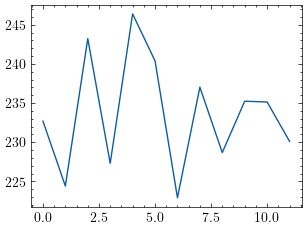

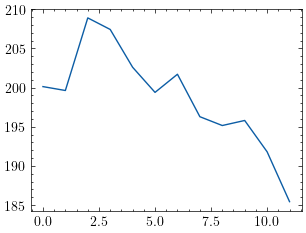

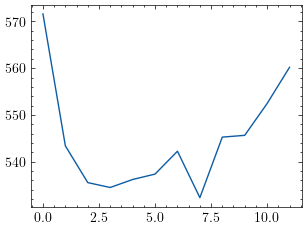

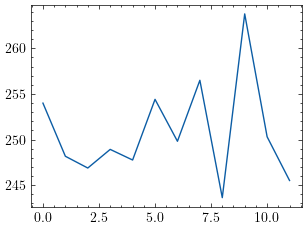

In [ ]:
rmse_np = pd.read_pickle("sensitivity_analysis/nb_features/rmse_no_physics.pkl")
zs_rmse_np = rmse_np.loc[(slice(None), 0),:]
zs_rmse_np = zs_rmse_np.droplevel(1)
for site in range(4):
    plt.figure()
    plt.plot(zs_rmse_np[site])
    plt.show()

### Physics-informed

In [ ]:
installation_int = 0
source_data,_,_ = data_handeler(installation_int, "nwp", "nwp", "nwp", HP_tuning=False)
# Labels are the values we want to predict
labels = np.array(source_data['P'])
# Remove the labels from the source_data
# axis 1 refers to the columns
source_data= source_data.drop('P', axis = 1)
# Saving feature names for later use
ftr_file = "features/ft_phys_sa.pkl"
if os.path.isfile(ftr_file):
    with open(ftr_file, 'rb') as f:
        feature_list = pickle.load(f)
# Convert to numpy array
source_data = source_data[feature_list]
source_data = np.array(source_data)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
# Print out rmse
print(errors, 'W')
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Not in Colab environment: Using .pkl files
Training Features Shape: (12582, 16)
Training Labels Shape: (12582,)
Testing Features Shape: (4194, 16)
Testing Labels Shape: (4194,)
241.21926501974775 W
Variable: PoA                  Importance: 0.81
Variable: P_24h_shift          Importance: 0.03
Variable: downward_surface_SW_flux Importance: 0.03
Variable: diffuse_surface_SW_flux Importance: 0.02
Variable: T_PV                 Importance: 0.02
Variable: wind_speed_10m       Importance: 0.02
Variable: relative_humidity_1_5m Importance: 0.01
Variable: direct_surface_SW_flux Importance: 0.01
Variable: month_sin            Importance: 0.01
Variable: hour_sin             Importance: 0.01
Variable: temperature_1_5m     Importance: 0.01
Variable: pressure_MSL         Importance: 0.01
Variable: is_day               Importance: 0.0
Variable: month_cos            Importance: 0.0
Variable: hour_cos             Importance: 0.0
Variable: total_cloud_amount   Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

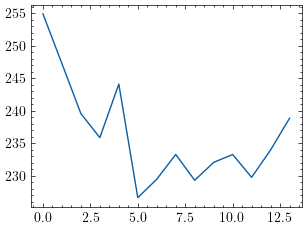

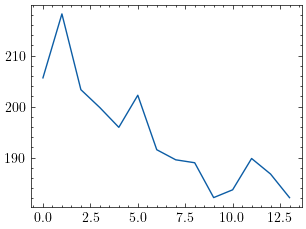

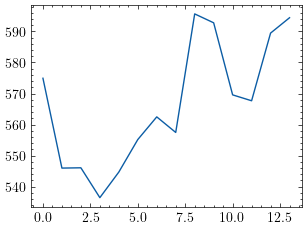

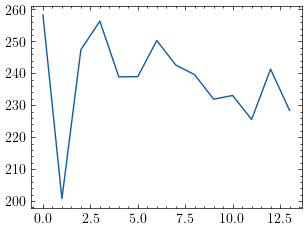

In [ ]:
rmse_p = pd.read_pickle("sensitivity_analysis/nb_features/rmse_physics.pkl")
zs_rmse_p = rmse_p.loc[(slice(None), 0),:]
zs_rmse_p = zs_rmse_p.droplevel(1)
for site in range(4):
    plt.figure()
    plt.plot(zs_rmse_p[site])
    plt.show()

## Other ML models

- SVM
- RF
- biLSTM
- seq2seq LSTM

### RF

In [6]:
rmse_rf = pd.DataFrame(index=range(4), columns=(range(9)))
metadata = pd.read_pickle("Data/Sites/metadata.pkl")
for site in range(9):
    for model in range(4): #Only treat nwp vs reanalysis and physics vs non-physics
        if model in [0,2]:
            phys=False
            phys_str = "no_phys.pkl"
        else:
            phys=True
            phys_str = "phys.pkl"
        if model in [0,1]:
            dataset_name = "nwp"
        else:
            dataset_name="era5"
        source_data,_,eval_data = data_handeler(site, dataset_name, "nwp", "nwp", phys, HP_tuning=False)
        eval_data = eval_data[24:31*24] #Only assess the first month
        lat = metadata.loc[site, "Latitude"]
        lon= metadata.loc[site, "Longitude"]
        loc = location.Location(lat, lon,altitude=location.lookup_altitude(lat,lon))
        source_times = source_data.index
        eval_times = eval_data.index

        sol_pos_source = loc.get_solarposition(source_times)
        sol_pos_eval = loc.get_solarposition(eval_times)

        zenith_filter_source = sol_pos_source["zenith"] <= 85
        zenith_filter_eval = sol_pos_eval["zenith"] <= 85

        source_data = source_data[zenith_filter_source]
        eval_data = eval_data[zenith_filter_eval]
        # Labels are the values we want to predict
        labels = np.array(source_data['P'])
        # Remove the labels from the source_data
        # axis 1 refers to the columns
        source_data= source_data.drop('P', axis = 1)
        # Saving feature names for later use
        ftr_file = "features/ft_" + phys_str
        if os.path.isfile(ftr_file):
            with open(ftr_file, 'rb') as f:
                feature_list = pickle.load(f)
        # Convert to numpy array
        source_data = source_data[feature_list]
        source_data = np.array(source_data)

        # Split the data into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
        #Instantiate model with 1000 decision trees
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # Train the model on training data
        rf.fit(train_features, train_labels)

        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
        # Print out rmse
        print("Test Error: ", errors, 'W')


        # Use the forest's predict method on the test data
        val_labels = eval_data['P']
        val_features = eval_data[feature_list]
        forecasts = rf.predict(val_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(forecasts - val_labels)))
        # Print out rmse
        print("Zero-shot RMSE: ", errors, 'W')
        rmse_rf.loc[model, site] = errors


Not in Colab environment: Using .pkl files
Training Features Shape: (8484, 7)
Training Labels Shape: (8484,)
Testing Features Shape: (2828, 7)
Testing Labels Shape: (2828,)
Test Error:  293.0567106145216 W
Zero-shot RMSE:  276.8213690782687 W
Not in Colab environment: Using .pkl files
Training Features Shape: (8484, 9)
Training Labels Shape: (8484,)
Testing Features Shape: (2828, 9)
Testing Labels Shape: (2828,)
Test Error:  285.23217658608496 W
Zero-shot RMSE:  264.83580159911634 W
Not in Colab environment: Using .pkl files
Training Features Shape: (8735, 7)
Training Labels Shape: (8735,)
Testing Features Shape: (2912, 7)
Testing Labels Shape: (2912,)


KeyboardInterrupt: 

In [4]:
rmse_rf.to_pickle("sensitivity_analysis/rmse_rf.pkl")
rmse_rf

,0,1,2,3
0,251.349834,NaN,NaN,NaN
1,235.579633,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


### SVM

In [7]:
rmse_svm = pd.DataFrame(index=range(4), columns=(range(9)))

for site in range(9):
    for model in range(4): #Only treat nwp vs reanalysis and physics vs non-physics
        if model in [0,2]:
            phys=False
            phys_str = "no_phys.pkl"
        else:
            phys=True
            phys_str = "phys.pkl"
        if model in [0,1]:
            dataset_name = "nwp"
        else:
            dataset_name="era5"
        source_data,_,eval_data = data_handeler(site, dataset_name, "nwp", "nwp", phys, HP_tuning=False)
        source_data,_,eval_data = data_handeler(site, dataset_name, "nwp", "nwp", phys, HP_tuning=False)
        eval_data = eval_data[24:31*24] #Only assess the first month
        lat = metadata.loc[site, "Latitude"]
        lon= metadata.loc[site, "Longitude"]
        loc = location.Location(lat, lon,altitude=location.lookup_altitude(lat,lon))
        source_times = source_data.index
        eval_times = eval_data.index

        sol_pos_source = loc.get_solarposition(source_times)
        sol_pos_eval = loc.get_solarposition(eval_times)

        zenith_filter_source = sol_pos_source["zenith"] <= 85
        zenith_filter_eval = sol_pos_eval["zenith"] <= 85

        source_data = source_data[zenith_filter_source]
        eval_data = eval_data[zenith_filter_eval]
        #Scale data (necessary for SVR)
        scale = Scale()
        scale.load(site, dataset_name, phys)
        max = scale.max
        min = scale.min
        for covar in source_data.columns:
            source_data[covar] = (source_data[covar]-min[covar])/(max[covar]-min[covar])
            eval_data[covar] = (eval_data[covar]-min[covar])/(max[covar]-min[covar])

        # Labels are the values we want to predict
        labels = np.array(source_data['P'])
        # Remove the labels from the source_data
        # axis 1 refers to the columns
        source_data= source_data.drop('P', axis = 1)
        # Saving feature names for later use
        ftr_file = "features/ft_" + phys_str
        if os.path.isfile(ftr_file):
            with open(ftr_file, 'rb') as f:
                feature_list = pickle.load(f)
        # Convert to numpy array
        source_data = source_data[feature_list]
        source_data = np.array(source_data)


        # Split the data into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
        



        #Instantiate model SVR
        rf = SVR(kernel='linear')
        # Train the model on training data
        rf.fit(train_features, train_labels)

        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
        # Print out rmse
        print("Test Error: ", errors, 'W')


        # Use the forest's predict method on the test data
        val_labels = eval_data['P']
        val_features = eval_data[feature_list]
        forecasts = rf.predict(val_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(forecasts - val_labels)))
        # Print out rmse
        print("Zero-shot RMSE: ", errors*(max['P']-min['P']), 'W')
        rmse_svm.loc[model, site] = errors*(max['P']-min['P'])

Not in Colab environment: Using .pkl files
Not in Colab environment: Using .pkl files
Training Features Shape: (8484, 7)
Training Labels Shape: (8484,)
Testing Features Shape: (2828, 7)
Testing Labels Shape: (2828,)
Test Error:  0.14456742780368748 W
Zero-shot RMSE:  285.601167524665 W
Not in Colab environment: Using .pkl files
Not in Colab environment: Using .pkl files
Training Features Shape: (8484, 9)
Training Labels Shape: (8484,)
Testing Features Shape: (2828, 9)
Testing Labels Shape: (2828,)
Test Error:  0.14682169421588478 W
Zero-shot RMSE:  270.7186756033595 W
Not in Colab environment: Using .pkl files
Not in Colab environment: Using .pkl files
Training Features Shape: (8735, 7)
Training Labels Shape: (8735,)
Testing Features Shape: (2912, 7)
Testing Labels Shape: (2912,)
Test Error:  0.13611591168220852 W
Zero-shot RMSE:  339.4076463483586 W
Not in Colab environment: Using .pkl files
Not in Colab environment: Using .pkl files
Training Features Shape: (8735, 9)
Training Labels 

KeyboardInterrupt: 

In [11]:
rmse_svm.to_pickle("sensitivity_analysis/rmse_svm.pkl")
rmse_svm

,0,1,2,3
0,NaN,255.686906,NaN,220.102551
1,NaN,219.443421,NaN,268.976432
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


### Results

In [2]:
rmse_rf = pd.read_pickle("sensitivity_analysis/rmse_rf.pkl")
rmse_svm = pd.read_pickle("sensitivity_analysis/rmse_svm.pkl")
rmse_lstm = pd.read_pickle("evaluation/Target/rmse.pkl")
rmse_lstm_zs = rmse_lstm.loc[(slice(None), 0),:]

In [3]:
rmse_lstm_zs

,,0,1,2,3,4,5,6,7,8,9,10,11
one,two,,,,,,,,,,,,
0,0,235.209457,233.59169,331.838501,1064.397461,1051.19397,282.325348,277.500732,229.066025,313.578351,347.224248,NaN,NaN
1,0,191.591125,223.27803,267.039154,924.650696,894.702332,261.253693,255.061783,229.066025,251.486302,317.334218,NaN,NaN
2,0,547.384949,555.264404,557.759827,1247.877808,1256.600464,558.055664,573.495178,229.066025,963.077546,672.385668,NaN,NaN
3,0,255.310547,228.768814,264.637787,576.130493,573.194092,268.332703,284.364807,229.066025,308.557303,257.454148,NaN,NaN
4,0,205.653976,210.734863,295.440643,984.862061,959.78064,241.906921,237.70575,229.066025,284.463765,330.797311,NaN,NaN
5,0,204.241302,177.273575,264.602295,868.627747,849.973511,220.390976,221.730301,229.066025,236.122276,281.954528,NaN,NaN
6,0,189.7565,191.514999,276.702942,799.301147,792.011353,221.079254,221.37085,229.066025,272.390569,304.416339,NaN,NaN
7,0,201.274048,199.913315,297.429504,829.863037,794.045654,185.693283,193.641449,229.066025,220.060379,328.520307,NaN,NaN
8,0,216.303635,220.95192,266.852264,773.802612,765.125549,230.501404,229.066025,229.066025,327.687825,293.181314,NaN,NaN


In [4]:
rmse_rf.astype(float).round(2)

,0,1,2,3,4,5,6,7,8,9
0,243.79,231.32,571.00,232.94,NaN,NaN,NaN,NaN,NaN,NaN
1,232.61,204.36,573.52,236.37,NaN,NaN,NaN,NaN,NaN,NaN
2,313.09,273.05,636.71,276.68,NaN,NaN,NaN,NaN,NaN,NaN
3,278.79,227.34,627.37,271.50,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rmse_svm.astype(float).round(2)

,0,1,2,3,4,5,6,7,8,9
0,283.58,255.74,573.06,224.59,NaN,NaN,NaN,NaN,NaN,NaN
1,262.97,201.99,587.90,251.16,NaN,NaN,NaN,NaN,NaN,NaN
2,322.25,271.35,651.42,264.34,NaN,NaN,NaN,NaN,NaN,NaN
3,298.25,242.52,636.26,287.15,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
persist = rmse_lstm_zs.loc[:,9]
persist = persist.droplevel(1)
(1-rmse_rf/persist).astype(float).round(4)

,0,1,2,3,4,5,6,7,8,9
0,0.2979,0.2711,0.1508,0.0952,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3301,0.3560,0.1470,0.0819,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0983,0.1395,0.0531,-0.0747,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1971,0.2836,0.0669,-0.0546,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
(1-rmse_svm/persist).astype(float).round(4)

,0,1,2,3,4,5,6,7,8,9
0,0.1833,0.1941,0.1477,0.1276,NaN,NaN,NaN,NaN,NaN,NaN
1,0.2426,0.3635,0.1257,0.0245,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0719,0.1449,0.0312,-0.0268,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1410,0.2358,0.0537,-0.1154,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
rmse_lstm_zs.loc[:,]

,,0,1,2,3
one,two,,,,
0,0,239.671646,232.886826,323.994781,1065.834473
1,0,192.388275,192.53064,270.19101,902.788391
2,0,543.174377,552.783203,550.550476,1244.890869
3,0,263.73407,253.86377,265.216675,582.92334


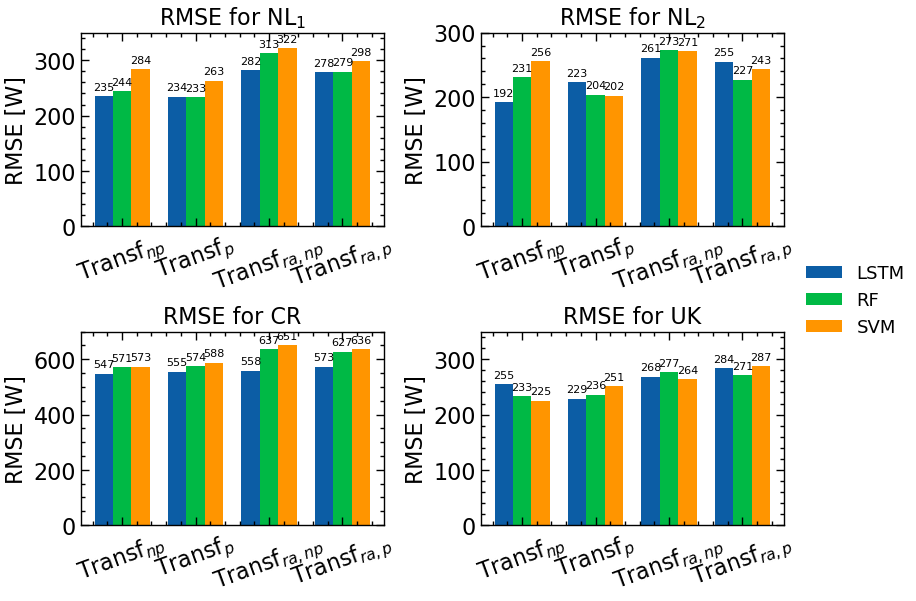

In [56]:
fig, axs = plt.subplots(2,2, layout="constrained")
width=0.25
y_limits = [350,300,700,350]
float_nb = 0
label_pos = np.arange(4)
site_list = [r"$\text{NL}_1$", r"$\text{NL}_2$", "CR", "UK"]
for site in range(4):
    x = site // 2
    y = site % 2
    lstm = rmse_lstm_zs.loc[site,[0,1,5,6]].values.flatten()
    rmse_list = [lstm.astype(float).round(float_nb), rmse_rf.loc[:,site].astype(float).round(float_nb), 
                 rmse_svm.loc[:,site].astype(float).round(float_nb)]
    label_list = ["LSTM", "RF", "SVM"]
    multipl = 0
    for i in range(3):
        rects = axs[x,y].bar(label_pos+multipl*width, rmse_list[i], width, label = label_list[i])
        axs[x,y].bar_label(rects, padding=3, fontsize=8)
        multipl += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[x,y].set_ylabel('RMSE [W]')
    axs[x,y].set_ylim([0,y_limits[site]])
    axs[x,y].set_title(f'RMSE for {site_list[site]}')
    axs[x,y].set_xticks(label_pos + width, rotation=20,
                        labels=[r"$\text{Transf}_{np}$", r"$\text{Transf}_{p}$", r"$\text{Transf}_{ra,np}$", r"$\text{Transf}_{ra,p}$"])
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels,bbox_to_anchor=(1.15, 0.5), loc = "center right", fontsize=13)

plt.savefig("Figures/sensitivity_analysis/ML_models", dpi=200)
plt.show()

## Nb of source years open-meteo

### Physics-informed

In [21]:
rmse_years_p = pd.read_pickle("sensitivity_analysis/nb_years/rmse_physics.pkl")
rmse_years_p.loc[(slice(None),0),:]

,,0,1,2,3
one,two,,,,
0,0,310.931427,284.975403,516.950256,250.525452
1,0,272.287598,229.795242,519.250427,266.496521
2,0,281.19809,244.821686,546.789978,270.432007
3,0,260.075043,224.122177,536.293701,247.499207
4,0,267.779297,245.841812,522.484985,222.195511
5,0,279.166901,277.62027,514.166748,191.881592
6,0,280.087067,249.35788,518.072632,256.02832
7,0,294.162292,233.777817,534.046265,218.123077
8,0,263.48584,233.580063,544.049866,222.231064


### Non-Physics-informed

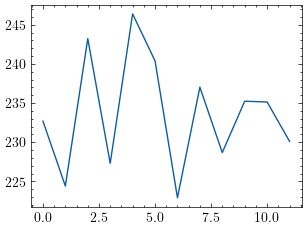

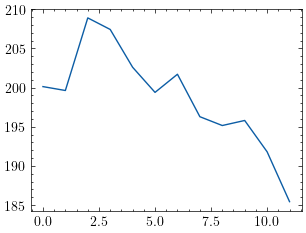

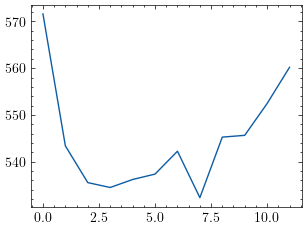

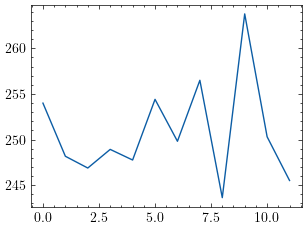

In [26]:
rmse_years_np = pd.read_pickle("sensitivity_analysis/nb_years/rmse_no_physics.pkl")
zs_rmse_years_np = rmse_years_np.loc[(slice(None),0),:]
zs_rmse_years_np.droplevel(1)
for site in range(4):
    plt.figure()
    plt.plot(zs_rmse_np[site])

## Change HP 

In [6]:
my_index = pd.MultiIndex.from_product([range(4), range(13)])
rmse = pd.DataFrame(index=my_index, columns=range(4))
rmse_source = pd.DataFrame(index=range(4), columns=range(4))
sites = range(4)
model = 0
warnings. filterwarnings('ignore') 
for model in range(1,4):
    if model in [1,3]:
        phys=True
        phys_str = "phys.pkl"
        model_hp = model-1
    else:
        phys=False
        phys_str = "no_phys.pkl"
        model_hp = model+1
    if model < 2:
        dataset_name = "nwp"
    else:
        dataset_name = "era5"
    
    for site in sites:
        source_data, _, eval_data = data_handeler(site, dataset_name, 'nwp', 'nwp', phys,  HP_tuning=False);
        ftr_file='features/ft_'+phys_str


        with open(ftr_file, 'rb') as f:
            features = pickle.load(f)
        scale = Scale()
        scale.load(site, dataset_name, phys)

        hp = hyperparameters_source()
        hp.load(model_hp)


        accuracy, state_dict, timer = source(source_data, features, hp, scale);
        rmse_source.loc[model, site] = accuracy
        hp = hyperparameters_target()
        hp.load(model_hp)
        hp.source_state_dict = state_dict
        accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

        df_forecasts = pd.Series(forecasts, index=eval_data.index[24:], name="P_DA")  
        df_forecasts.to_pickle(f"sensitivity_analysis/change_HP/DA_{model}_{site}.pkl") 
        rmse.loc[(0, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([841, 24, 8]) torch.Size([210, 24, 8]) torch.Size([841, 24, 1]) torch.Size([210, 24, 1])
Step 0: Average train loss: 0.0687 | Average test loss: 0.0599
Step 5: Average train loss: 0.0254 | Average test loss: 0.0172
Step 10: Average train loss: 0.0132 | Average test loss: 0.0105
Step 15: Average train loss: 0.0128 | Average test loss: 0.0090
Step 20: Average train loss: 0.0113 | Average test loss: 0.0088
Step 25: Average train loss: 0.0109 | Average test loss: 0.0086
Step 30: Average train loss: 0.0105 | Average test loss: 0.0084
Step 35: Average train loss: 0.0104 | Average test loss: 0.0083
Step 40: Average train loss: 0.0102 | Average test loss: 0.0082
Step 45: Average train loss: 0.0102 | Average test loss: 0.0082
Step 50: Average train loss: 0.0101 | Average test loss: 0.0082
Step 55: Average train loss: 0.0100 | Average test loss: 0.0081
Step 60: Average train loss: 0.0100 | Average test loss: 0.0081
Step 65: Av

KeyboardInterrupt: 